In [177]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [178]:
df = pd.read_csv('data/reprocessed/director_features.csv').dropna()

In [179]:
data = pd.read_csv('data/reprocessed/edges.csv')

In [180]:
df

,director,TV-MA,TV-14,PG-13,PG,R,TV-PG,G,TV-Y,TV-Y7,TV-G
0,Haile Gerima,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Andy Devonshire,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Theodore Melfi,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Christian Schwochow,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,S. Shankar,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2406,Akshay Akkineni,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2407,Nidhi Sharma,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2408,Vipin Parashar,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2409,Vikram Pradhan,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
directors_features = df.iloc[:, 1:]

In [182]:
directors_features

,TV-MA,TV-14,PG-13,PG,R,TV-PG,G,TV-Y,TV-Y7,TV-G
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2406,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2407,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2408,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2409,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>K-means</h1>

In [183]:
sum_distances = []
k = range(2,9)
for i in k:
    k_means = KMeans(n_clusters=i)
    k_means.fit(directors_features)
    sum_distances.append(k_means.inertia_)

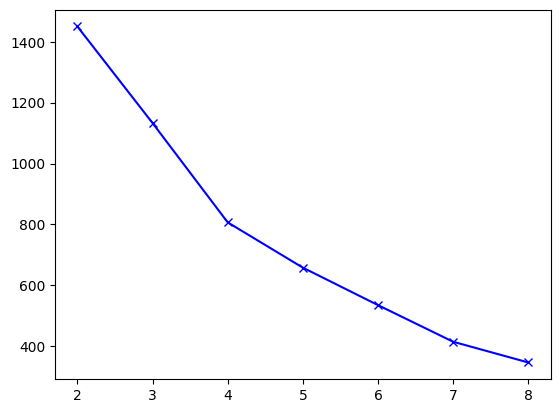

In [184]:
plt.plot(k, sum_distances, 'bx-')

In [185]:
k_means = KMeans(n_clusters=5)
k_means.fit(directors_features)

KMeans(n_clusters=5)

In [186]:
labels = k_means.labels_

In [187]:
len(labels)

2411

In [188]:
df = pd.concat([df, pd.DataFrame(labels, columns=['label'])], axis=1)

In [189]:
df

,director,TV-MA,TV-14,PG-13,PG,R,TV-PG,G,TV-Y,TV-Y7,TV-G,label
0,Haile Gerima,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,Andy Devonshire,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Theodore Melfi,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,Christian Schwochow,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,S. Shankar,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2406,Akshay Akkineni,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2407,Nidhi Sharma,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
2408,Vipin Parashar,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
2409,Vikram Pradhan,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Text(0.5, 1.0, 'Group 1')

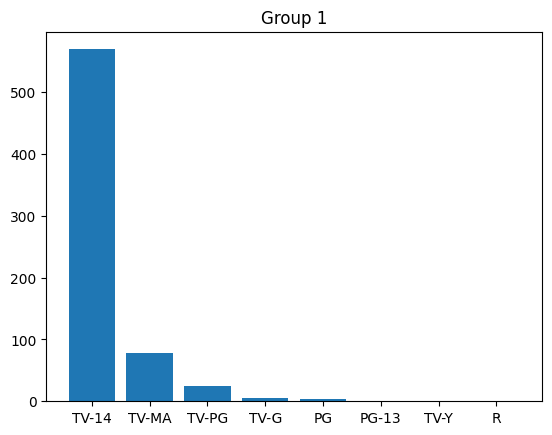

In [190]:
group_number = 0
directors_in_group = []
for i, r in df.iterrows():
    if r['label'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title('Group 1')

Text(0.5, 1.0, 'Group 2')

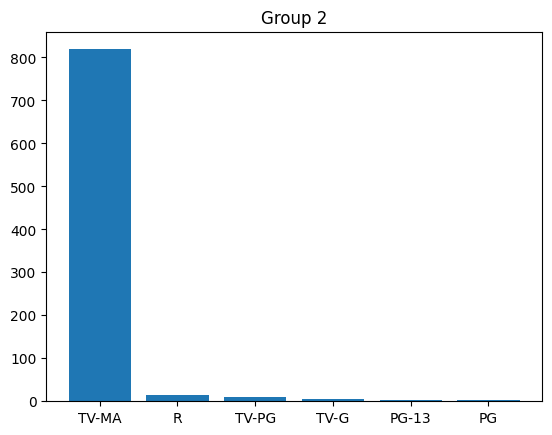

In [191]:
group_number = 1
directors_in_group = []
for i, r in df.iterrows():
    if r['label'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title('Group 2')

Text(0.5, 1.0, 'Group 3')

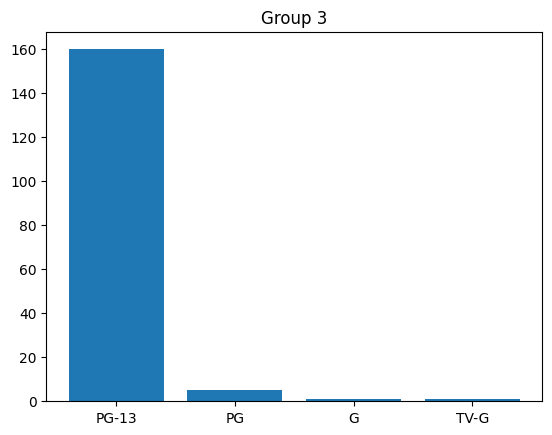

In [192]:
group_number = 2
directors_in_group = []
for i, r in df.iterrows():
    if r['label'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title('Group 3')

Text(0.5, 1.0, 'Group 4')

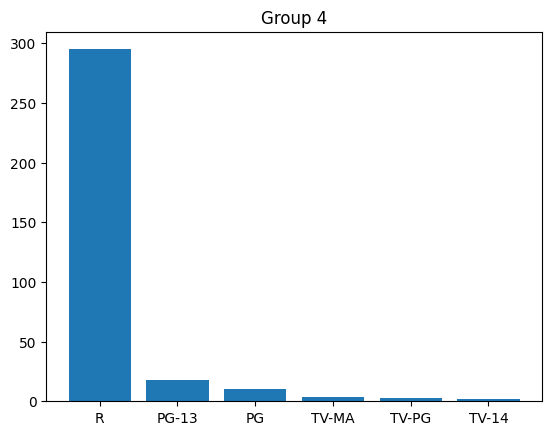

In [193]:
group_number = 3
directors_in_group = []
for i, r in df.iterrows():
    if r['label'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title('Group 4')

Text(0.5, 1.0, 'Group 5')

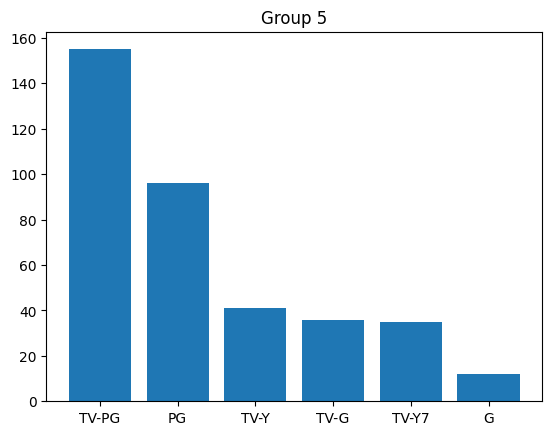

In [194]:
group_number = 4
directors_in_group = []
for i, r in df.iterrows():
    if r['label'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title('Group 5')

<h1>DBSCAN</h1>

In [195]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples=110)
dbscan.fit(directors_features)

DBSCAN(min_samples=110)

In [196]:
labels_bdscan = dbscan.labels_

In [197]:
len(set(labels_bdscan))

7

In [198]:
df = pd.concat([df, pd.DataFrame(labels_bdscan, columns=['label_dbscan'])], axis=1)

Text(0.5, 1.0, 'Group 1')

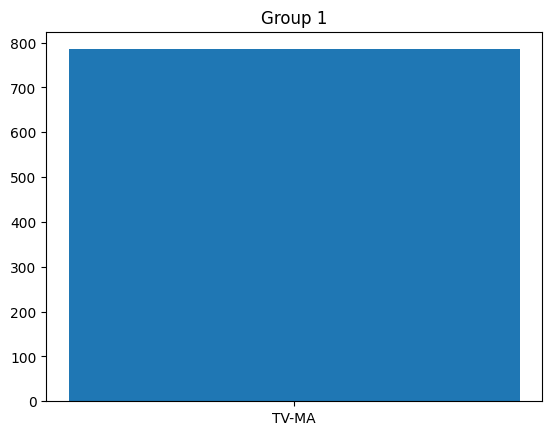

In [199]:
group_number = 0
directors_in_group = []
for i, r in df.iterrows():
    if r['label_dbscan'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title('Group 1')

Text(0.5, 1.0, 'Group 2')

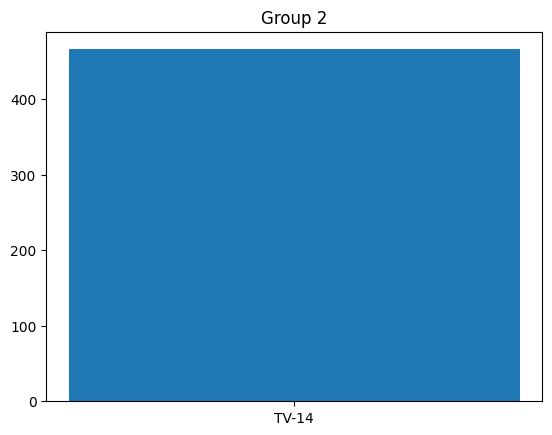

In [200]:
group_number = 1
directors_in_group = []
for i, r in df.iterrows():
    if r['label_dbscan'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title('Group 2')

Text(0.5, 1.0, 'Group 3')

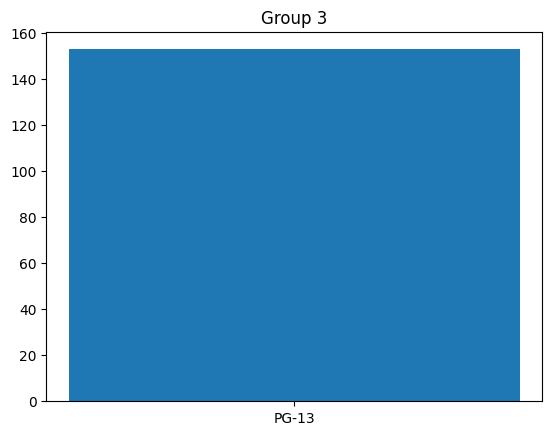

In [201]:
group_number = 2
directors_in_group = []
for i, r in df.iterrows():
    if r['label_dbscan'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title(f'Group {group_number + 1}')

Text(0.5, 1.0, 'Group 4')

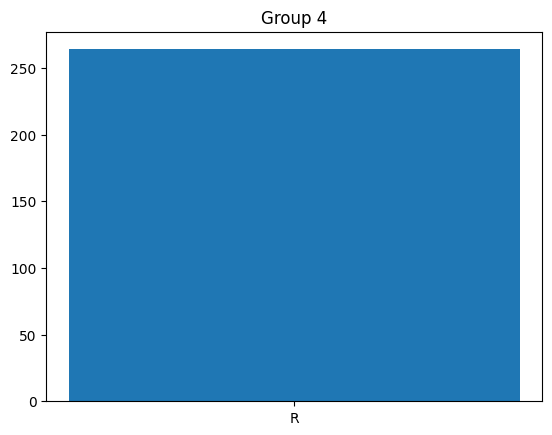

In [202]:
group_number = 3
directors_in_group = []
for i, r in df.iterrows():
    if r['label_dbscan'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title(f'Group {group_number + 1}')

Text(0.5, 1.0, 'Group 5')

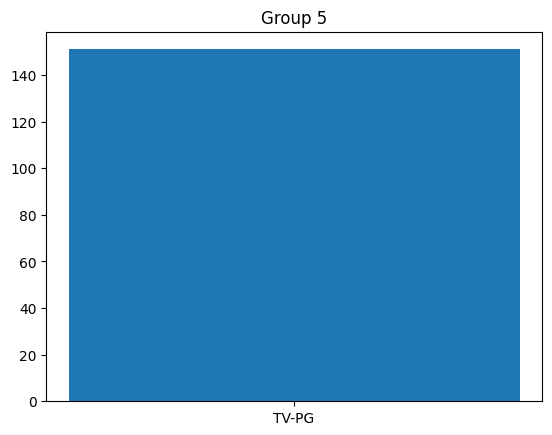

In [203]:
group_number = 4
directors_in_group = []
for i, r in df.iterrows():
    if r['label_dbscan'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title(f'Group {group_number + 1}')

Text(0.5, 1.0, 'Group 6')

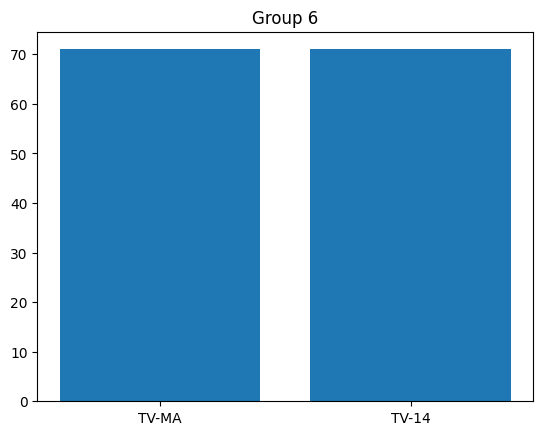

In [204]:
group_number = 5
directors_in_group = []
for i, r in df.iterrows():
    if r['label_dbscan'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title(f'Group {group_number + 1}')

Text(0.5, 1.0, 'Group 7')

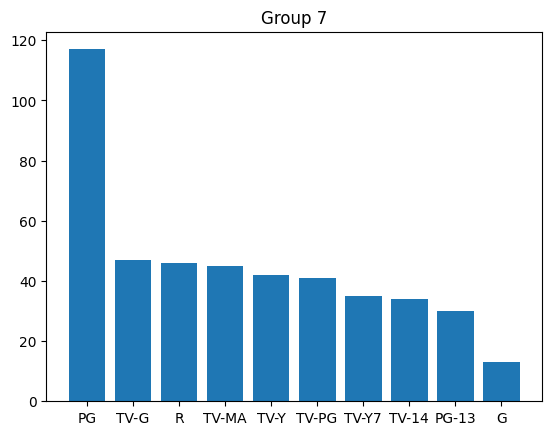

In [205]:
group_number = -1
directors_in_group = []
for i, r in df.iterrows():
    if r['label_dbscan'] == group_number:
        directors_in_group.append(r['director'])
ls = []
for i, r in data.iterrows():
    if r['director'] in directors_in_group:
        ls.append(r)
df_group = pd.DataFrame(ls)['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(df_group['rating'], df_group['counts'])
plt.title(f'Group 7')

In [3]:
from numpy.linalg import norm

In [22]:
norm([0.038277596,
0.002712285,
0.017658365,
0.021117995,
0.044338673,
0.017741493,
0.126762584,
0.017906945,
0.027151363,
0.017741493

])

0.14816330645014836

In [ ]:
0.208797763
0.108937963
0.245110417
0.199719599
0.508377161
0.35404838
0.35404838
0.344970217
0.136172454
0.35404838
